## Goal of notebook

   initialize all rivers with TA, DIC of 820, 750

In [20]:
#import all the things

%reset
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import xarray as xr 
import subprocess 
import cmocean

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [21]:
d_riv = '/data/tjarniko/MEOPAR/rivers-climatology/bio/'
d_riv2 = '/data/tjarniko/MEOPAR/rivers/bio/'
tr = 'rivers_bio_tracers_m01d02.nc'

w = nc.Dataset(d_riv+tr)
w2 = nc.Dataset(d_riv2+tr)

In [22]:
print(w)
print(w2)




<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(398), y(898), time_counter(1)
    variables(dimensions): float64 nav_lat(y,x), float64 nav_lon(y,x), float64 time_counter(time_counter), float64 no3(time_counter,y,x), float64 nh4(time_counter,y,x), float64 sil(time_counter,y,x), float64 dia(time_counter,y,x), float64 phy(time_counter,y,x), float64 mes(time_counter,y,x), float64 zoo(time_counter,y,x), float64 don(time_counter,y,x), float64 pon(time_counter,y,x), float64 bsi(time_counter,y,x), float64 oxy(time_counter,y,x), float64 tur(time_counter,y,x)
    groups: 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(398), y(898), time_counter(1)
    variables(dimensions): float64 nav_lat(y,x), float64 nav_lon(y,x), float64 time_counter(time_counter), float64 no3(time_counter,y,x), float64 nh4(time_counter,y,x), float64 sil(time_counter,y,x), float64 dia(time_counter,y

In [23]:
q = w.variables['no3'][:]
q2 = w2.variables['no3'][:]
#print(np.max(q))
q = np.squeeze(q)
q2 = np.squeeze(q2)
np.shape(q)

print(q[260:270,240:248])
print('d')
print(q2[260:270,240:248])

[[ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.55134139]
 [ 8.55134139  8.55134139  8.55134139  8.55134139  8.55134139  8.55134139
   8.55134139  8.

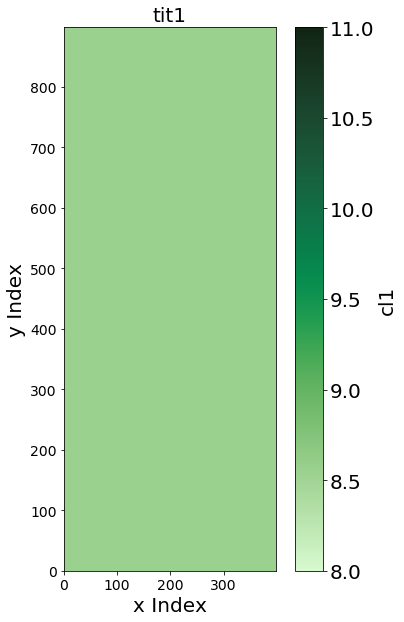

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7, 10), sharey=True)
t_cmap = cm.cm.algae
tplt = q
ax.set_title('tit1',fontsize = 20 )
v_min = 8
v_max = 11
clabel = 'cl1'

viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label(clabel, fontsize = 20 )
cbar.ax.tick_params(labelsize=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
t_cmap.set_bad('aliceblue')
#plt.suptitle(bigtit,fontsize=20)

In [25]:
# /data/tjarniko/MEOPAR/rivers/bio
# rivers_bio_tracers_m
nclist =[]
ncblist =[]
days = [31,29,31,30,31,30,31,31,30,31,30,31]
for m in range (1,13):
    if m < 10:
        tm = '0' + str(m)
    else:
        tm = str(m)
    
    tdaynum = days[m-1]
    for d in range(1,tdaynum+1):
        if d < 10:
            td = '0' + str(d)
        else:
            td = str(d)
        tnc = 'rivers_skog_tracers_m' + tm + 'd' + td + '.nc'
        tnc2 = 'rivers_bio_tracers_m' + tm + 'd' + td + '.nc'
        nclist.append(tnc)
        ncblist.append(tnc2)
        print(tnc)


rivers_skog_tracers_m01d01.nc
rivers_skog_tracers_m01d02.nc
rivers_skog_tracers_m01d03.nc
rivers_skog_tracers_m01d04.nc
rivers_skog_tracers_m01d05.nc
rivers_skog_tracers_m01d06.nc
rivers_skog_tracers_m01d07.nc
rivers_skog_tracers_m01d08.nc
rivers_skog_tracers_m01d09.nc
rivers_skog_tracers_m01d10.nc
rivers_skog_tracers_m01d11.nc
rivers_skog_tracers_m01d12.nc
rivers_skog_tracers_m01d13.nc
rivers_skog_tracers_m01d14.nc
rivers_skog_tracers_m01d15.nc
rivers_skog_tracers_m01d16.nc
rivers_skog_tracers_m01d17.nc
rivers_skog_tracers_m01d18.nc
rivers_skog_tracers_m01d19.nc
rivers_skog_tracers_m01d20.nc
rivers_skog_tracers_m01d21.nc
rivers_skog_tracers_m01d22.nc
rivers_skog_tracers_m01d23.nc
rivers_skog_tracers_m01d24.nc
rivers_skog_tracers_m01d25.nc
rivers_skog_tracers_m01d26.nc
rivers_skog_tracers_m01d27.nc
rivers_skog_tracers_m01d28.nc
rivers_skog_tracers_m01d29.nc
rivers_skog_tracers_m01d30.nc
rivers_skog_tracers_m01d31.nc
rivers_skog_tracers_m02d01.nc
rivers_skog_tracers_m02d02.nc
rivers_sko

In [27]:

d_riv = '/data/tjarniko/MEOPAR/rivers-climatology/bio/'
d_riv2 = '/data/tjarniko/MEOPAR/rivers/bio/'


#dsin = ds2
#output file

for day in range(0,366):
    print(day)
    dsin = nc.Dataset(d_riv + ncblist[day])
    nd = '/data/tjarniko/MEOPAR/rivers_T_carp/'
    ncname = nd + nclist[day]
    print(ncname)
    dsout = nc.Dataset(ncname, "w", format="NETCDF4")
    #Copy dimensions
    for dname, the_dim in dsin.dimensions.items():
        #print(dname)
        #print(len(the_dim))
        dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
    # Copy variables
    for v_name, varin in dsin.variables.items():
        outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
        #print(varin.datatype)

        # Copy variable attributes
        outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

        outVar[:] = varin[:]

    dic = dsout.createVariable('dic',np.float64,('time_counter','y','x'))
    ta = dsout.createVariable('ta',np.float64,('time_counter','y','x'))

    dsout['dic'][:] = 820
    dsout['ta'][:] = 750

    dsout.close()

0
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d01.nc
1
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d02.nc
2
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d03.nc
3
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d04.nc
4
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d05.nc
5
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d06.nc
6
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d07.nc
7
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d08.nc
8
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d09.nc
9
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d10.nc
10
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d11.nc
11
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d12.nc
12
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d13.nc
13
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m01d14.nc
14
/data/tjarniko/MEOPAR/rivers_T_carp/river

119
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m04d29.nc
120
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m04d30.nc
121
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d01.nc
122
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d02.nc
123
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d03.nc
124
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d04.nc
125
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d05.nc
126
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d06.nc
127
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d07.nc
128
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d08.nc
129
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d09.nc
130
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d10.nc
131
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d11.nc
132
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m05d12.nc
133
/data/tjarniko/M

237
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d25.nc
238
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d26.nc
239
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d27.nc
240
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d28.nc
241
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d29.nc
242
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d30.nc
243
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m08d31.nc
244
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d01.nc
245
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d02.nc
246
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d03.nc
247
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d04.nc
248
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d05.nc
249
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d06.nc
250
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m09d07.nc
251
/data/tjarniko/M

355
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d21.nc
356
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d22.nc
357
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d23.nc
358
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d24.nc
359
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d25.nc
360
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d26.nc
361
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d27.nc
362
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d28.nc
363
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d29.nc
364
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d30.nc
365
/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m12d31.nc


In [28]:
w = nc.Dataset('/data/tjarniko/MEOPAR/rivers_T_carp/rivers_skog_tracers_m07d01.nc')
w2 = nc.Dataset('/data/tjarniko/MEOPAR/rivers-climatology/bio/rivers_bio_tracers_m07d01.nc')
print(w.variables['no3'][0,250:252,250:252])
print(w2.variables['no3'][0,250:252,250:252])

[[ 4.5714601  4.5714601]
 [ 4.5714601  4.5714601]]
[[ 4.5714601  4.5714601]
 [ 4.5714601  4.5714601]]


In [29]:
w3 = nc.Dataset('/results/forcing/rivers/RallFraCElse_y2017m02d19.nc')
print(w3)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Real Fraser Values, Daily Climatology for Other Rivers
    dimensions(sizes): x(398), y(898), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 time_counter(time_counter), float32 rorunoff(time_counter,y,x), float32 rodepth(y,x)
    groups: 



In [30]:
import subprocess
#twc = 'ncks -4 -L4 -O rivers_bio_tracers_m12d22.nc rivers_bio_tracers_m12d22.nc'
resdir = '/data/tjarniko/MEOPAR/rivers_T_carp/'

for day in range(0,366):
    tc = 'ncks -4 -L4 -O ' + nclist[day] + ' ' + nclist[day]
    print(tc)
    %time subprocess.call(tc, shell=True,cwd=resdir)

ncks -4 -L4 -O rivers_skog_tracers_m01d01.nc rivers_skog_tracers_m01d01.nc
CPU times: user 4 ms, sys: 24 ms, total: 28 ms
Wall time: 512 ms
ncks -4 -L4 -O rivers_skog_tracers_m01d02.nc rivers_skog_tracers_m01d02.nc
CPU times: user 8 ms, sys: 32 ms, total: 40 ms
Wall time: 487 ms
ncks -4 -L4 -O rivers_skog_tracers_m01d03.nc rivers_skog_tracers_m01d03.nc
CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 507 ms
ncks -4 -L4 -O rivers_skog_tracers_m01d04.nc rivers_skog_tracers_m01d04.nc
CPU times: user 8 ms, sys: 32 ms, total: 40 ms
Wall time: 517 ms
ncks -4 -L4 -O rivers_skog_tracers_m01d05.nc rivers_skog_tracers_m01d05.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 526 ms
ncks -4 -L4 -O rivers_skog_tracers_m01d06.nc rivers_skog_tracers_m01d06.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 531 ms
ncks -4 -L4 -O rivers_skog_tracers_m01d07.nc rivers_skog_tracers_m01d07.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 528 ms
ncks -4 -L4 -O river

CPU times: user 4 ms, sys: 16 ms, total: 20 ms
Wall time: 441 ms
ncks -4 -L4 -O rivers_skog_tracers_m02d29.nc rivers_skog_tracers_m02d29.nc
CPU times: user 0 ns, sys: 24 ms, total: 24 ms
Wall time: 449 ms
ncks -4 -L4 -O rivers_skog_tracers_m03d01.nc rivers_skog_tracers_m03d01.nc
CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 531 ms
ncks -4 -L4 -O rivers_skog_tracers_m03d02.nc rivers_skog_tracers_m03d02.nc
CPU times: user 8 ms, sys: 32 ms, total: 40 ms
Wall time: 531 ms
ncks -4 -L4 -O rivers_skog_tracers_m03d03.nc rivers_skog_tracers_m03d03.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 519 ms
ncks -4 -L4 -O rivers_skog_tracers_m03d04.nc rivers_skog_tracers_m03d04.nc
CPU times: user 4 ms, sys: 24 ms, total: 28 ms
Wall time: 520 ms
ncks -4 -L4 -O rivers_skog_tracers_m03d05.nc rivers_skog_tracers_m03d05.nc
CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 532 ms
ncks -4 -L4 -O rivers_skog_tracers_m03d06.nc rivers_skog_tracers_m03d06.nc
CPU times: user 0 ns

CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 522 ms
ncks -4 -L4 -O rivers_skog_tracers_m04d28.nc rivers_skog_tracers_m04d28.nc
CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 526 ms
ncks -4 -L4 -O rivers_skog_tracers_m04d29.nc rivers_skog_tracers_m04d29.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 521 ms
ncks -4 -L4 -O rivers_skog_tracers_m04d30.nc rivers_skog_tracers_m04d30.nc
CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 527 ms
ncks -4 -L4 -O rivers_skog_tracers_m05d01.nc rivers_skog_tracers_m05d01.nc
CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 529 ms
ncks -4 -L4 -O rivers_skog_tracers_m05d02.nc rivers_skog_tracers_m05d02.nc
CPU times: user 8 ms, sys: 28 ms, total: 36 ms
Wall time: 526 ms
ncks -4 -L4 -O rivers_skog_tracers_m05d03.nc rivers_skog_tracers_m05d03.nc
CPU times: user 0 ns, sys: 24 ms, total: 24 ms
Wall time: 498 ms
ncks -4 -L4 -O rivers_skog_tracers_m05d04.nc rivers_skog_tracers_m05d04.nc
CPU times: user 4 ms

CPU times: user 0 ns, sys: 24 ms, total: 24 ms
Wall time: 506 ms
ncks -4 -L4 -O rivers_skog_tracers_m06d26.nc rivers_skog_tracers_m06d26.nc
CPU times: user 8 ms, sys: 28 ms, total: 36 ms
Wall time: 532 ms
ncks -4 -L4 -O rivers_skog_tracers_m06d27.nc rivers_skog_tracers_m06d27.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 527 ms
ncks -4 -L4 -O rivers_skog_tracers_m06d28.nc rivers_skog_tracers_m06d28.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 526 ms
ncks -4 -L4 -O rivers_skog_tracers_m06d29.nc rivers_skog_tracers_m06d29.nc
CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 520 ms
ncks -4 -L4 -O rivers_skog_tracers_m06d30.nc rivers_skog_tracers_m06d30.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 526 ms
ncks -4 -L4 -O rivers_skog_tracers_m07d01.nc rivers_skog_tracers_m07d01.nc
CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 520 ms
ncks -4 -L4 -O rivers_skog_tracers_m07d02.nc rivers_skog_tracers_m07d02.nc
CPU times: user 0 ns

CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 529 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d24.nc rivers_skog_tracers_m08d24.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 528 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d25.nc rivers_skog_tracers_m08d25.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 531 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d26.nc rivers_skog_tracers_m08d26.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 486 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d27.nc rivers_skog_tracers_m08d27.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 517 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d28.nc rivers_skog_tracers_m08d28.nc
CPU times: user 8 ms, sys: 28 ms, total: 36 ms
Wall time: 527 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d29.nc rivers_skog_tracers_m08d29.nc
CPU times: user 0 ns, sys: 20 ms, total: 20 ms
Wall time: 515 ms
ncks -4 -L4 -O rivers_skog_tracers_m08d30.nc rivers_skog_tracers_m08d30.nc
CPU times: user 0 ns

CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 529 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d22.nc rivers_skog_tracers_m10d22.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 456 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d23.nc rivers_skog_tracers_m10d23.nc
CPU times: user 8 ms, sys: 28 ms, total: 36 ms
Wall time: 527 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d24.nc rivers_skog_tracers_m10d24.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 525 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d25.nc rivers_skog_tracers_m10d25.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 528 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d26.nc rivers_skog_tracers_m10d26.nc
CPU times: user 4 ms, sys: 32 ms, total: 36 ms
Wall time: 529 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d27.nc rivers_skog_tracers_m10d27.nc
CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 530 ms
ncks -4 -L4 -O rivers_skog_tracers_m10d28.nc rivers_skog_tracers_m10d28.nc
CPU times: user 4 ms

CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 518 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d20.nc rivers_skog_tracers_m12d20.nc
CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 525 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d21.nc rivers_skog_tracers_m12d21.nc
CPU times: user 4 ms, sys: 28 ms, total: 32 ms
Wall time: 521 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d22.nc rivers_skog_tracers_m12d22.nc
CPU times: user 4 ms, sys: 24 ms, total: 28 ms
Wall time: 518 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d23.nc rivers_skog_tracers_m12d23.nc
CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 529 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d24.nc rivers_skog_tracers_m12d24.nc
CPU times: user 8 ms, sys: 28 ms, total: 36 ms
Wall time: 520 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d25.nc rivers_skog_tracers_m12d25.nc
CPU times: user 0 ns, sys: 32 ms, total: 32 ms
Wall time: 523 ms
ncks -4 -L4 -O rivers_skog_tracers_m12d26.nc rivers_skog_tracers_m12d26.nc
CPU times: user 4 ms